Example notebook for the Young Stellar Objects metric. 
Please contact Loredo Prisidano for more information about the details of the metric. 

The basic premise is to count how many young stellar objects above a SNR cut in g,r, and i bands are available in the coadded images. Dust extinction and distance modulus are taken into account, when searching for stars above a given absolute magnitude. 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import rubin_sim.maf as maf
from rubin_sim.data import get_baseline


In [2]:
baseline_file = get_baseline()
run_name = os.path.basename(baseline_file).replace('.db','')
outDir = "temp"
resultsDb = maf.db.ResultsDb(out_dir=outDir)

In [3]:
# Set up YSO metric - which counts the number of expected young stellar objects detectable with Rubin

nside = 64
bundleList = []
sql = ""
# Let's plug in the magnitudes for one type
metric = maf.maf_contrib.NYoungStarsMetric()

print("Metric is looking for YSO with the following absolute magnitudes", metric.mags)

slicer = maf.slicers.HealpixSlicer(nside=nside, use_cache=False)

summaryStats = [maf.metrics.SumMetric(), maf.metrics.MaxMetric()]
plotDict = {"logScale": True, 'figsize': (8, 6), "colorMin": 1, #"colorMax":1e5, 
            "cbarFormat":'%.0e'}
bundleList.append(
    maf.metricBundles.MetricBundle(
        metric, slicer, sql, plot_dict=plotDict, summary_metrics=summaryStats, run_name=run_name
    )
)

Metric is looking for YSO with the following absolute magnitudes {'g': 10.32, 'r': 9.28, 'i': 7.97}
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


Read map /Users/yoachim/rubin_sim_data/maps/DustMaps3D/merged_ebv3d_nside64_defaults.fits from disk


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:148: UserWarning: Optimal bin calculation tried to make 962 bins, returning 200
  warnings.warn(


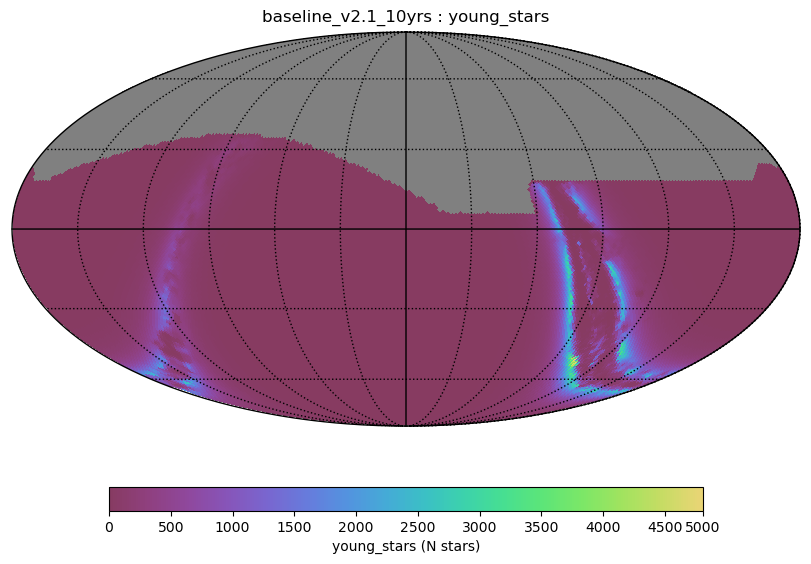

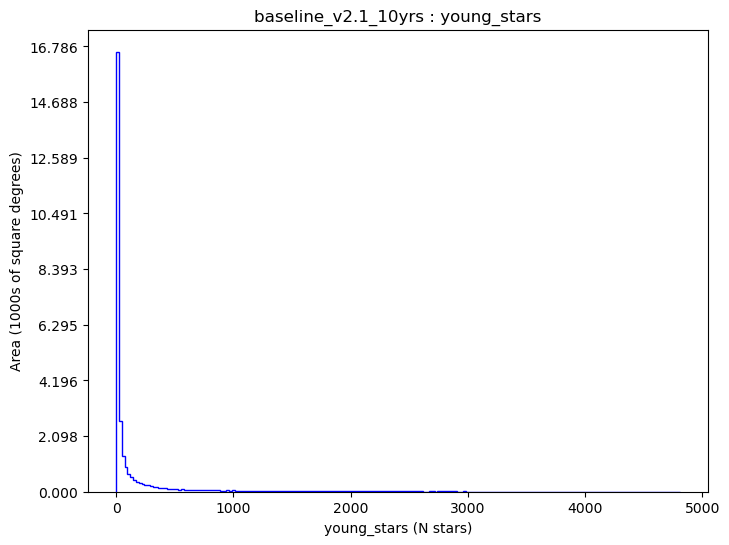

In [4]:
bd = maf.metricBundles.make_bundles_dict_from_list(bundleList)
bg = maf.metricBundles.MetricBundleGroup(bd, baseline_file, out_dir=outDir, results_db=resultsDb)
bg.run_all()
bg.plot_all(closefigs=False)

In [5]:
pd.DataFrame([bd[k].summary_values for k in bd], index=list(bd.keys()))

,Sum,Max
baseline_v2_1_10yrs_young_stars_HEAL,4.869433e+06,4809.109352


In [7]:
b = bundleList[0]
print(np.sum(b.metric_values.compressed()), 
      np.median(b.metric_values.compressed()), np.mean(b.metric_values.compressed()), 
      np.max(b.metric_values.compressed()), np.min(b.metric_values.compressed()), 
      np.std(b.metric_values.compressed()))

4869433.349554985 13.956896357306107 145.00992702665232 4809.109351946863 1.4377116280368388e-09 365.9788294747799
